In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def f_prime_x1(x1,x2):
  return (4* x1 + 3.4* np.pi * x2 * np.sin (0.2* np.pi *x1) - x2)

def f_prime_x2(x1,x2):
  return (4*x2 - 17*np.cos((0.2)*np.pi*x1) - x1)

def f_zegond_x1(x1,x2):
  return (4 + 0.68* x2 *(np.pi**2) * np.cos(0.2*np.pi*x1) )

def f_zegond_x2(x1,x2):
  return 4

def newtton_method(n, x1, x2):
  for i in range(n):
    new_x1,new_x2 = 0,0
    new_x1 = x1 - (f_prime_x1(x1,x2) / f_zegond_x1(x1,x2))
    new_x2 = x2 - (f_prime_x2(x1,x2) / f_zegond_x2(x1,x2))
    x1 = new_x1
    x2 = new_x2
  return x1,x2

def func(x1,x2):
  return 2*(x1)**2 + 2*(x2)**2 - 17* x2 *np.cos((0.2)*np.pi*x1) - x1 * x2


def distance_detector(x1,x2,target):
  if np.abs(func(x1,x2)-target) <2:
    return 'close'
  elif np.abs(func(x1,x2)-target) <200:
    return 'far'
  else:
    return'farther'


In [3]:
x1_startPoint = -5 
x1_endPoint = 5 
x2_startPoint = 0
x2_endPoint = 10
stepSize = 0.5

x1 = np.arange(x1_startPoint, x1_endPoint+stepSize, stepSize)
x2 = np.arange(x2_startPoint, x2_endPoint+stepSize, stepSize)

print(len(x1))
print(len(x2))


21
21


In [4]:
dist_list =[]
final_value = -36.4
points =[]

for i in range (len(x1)):
  for k in range (len(x2)):
    x_1,x_2 = newtton_method(100, i,k)
    dist_list.append(distance_detector(x_1,x_2,final_value))
    points.append([i,k])


In [5]:
x1_0 = 1
x2_0 = 3
X1, X2 = 0,0
X1, X2 = newtton_method(100,x1_0,x2_0)
print("minimum point was found at x1 = ", X1)
print("minimum point was found at x2 = ", X2)
print("minimun value of the function is ",func(X1,X2))


minimum point was found at x1 =  0.13087466007249957
minimum point was found at x2 =  4.268357652256218
minimun value of the function is  -36.40349774185023


##plot the distance graph

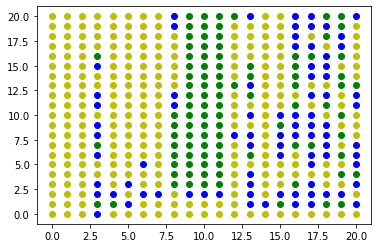

In [6]:
for i in range(len(points)):
  if dist_list[i] == 'close':
    plt.scatter(points[i][0], points[i][1], color='y')
  elif dist_list[i] == 'far':
    plt.scatter(points[i][0], points[i][1], color='g')
  else:
    plt.scatter(points[i][0], points[i][1], color='b')


#Part 2


In [23]:
class Genetic(object):

    def __init__(self, f, pop_size = 100, n_variables = 2):
        self.f = f
        self.minim = -15
        self.maxim = 15
        self.pop_size = pop_size
        self.n_variables = n_variables
        self.population = self.initializePopulation()
        self.evaluatePopulation()

    def initializePopulation(self):
        return [np.random.randint(self.minim, self.maxim, size=(self.n_variables)) 
                           for i in range(self.pop_size)]

    def evaluatePopulation(self):
        return [self.f(i[0], i[1]) for i in self.population]

    def fitness(self, results):
        randA, randB = np.random.randint(0, self.pop_size),np.random.randint(0, self.pop_size)
        if results[randA] < results[randB]: p1 = self.population[randA]
        else: p1 = self.population[randB]

        randA, randB = np.random.randint(0, self.pop_size), \
                        np.random.randint(0, self.pop_size)  
        if results[randA] < results[randB]: p2 = self.population[randA]
        else: p2 = self.population[randB] 
        return p1,p2

    def child(self,p1,p2):
      child = []
      for i, j in zip(p1, p2):
          for k, l in zip(i, j):
              if k == l:
                 child.append(k)
              else:
                 child.append(str(np.random.randint(min(k, l), max(k,l))))  
      return child    


    def generate_binary(self, p1,p2):
      for i in p1:
        p1 = format(abs(i), '010b')
      for i in p2:
        p2 = format(abs(i), '010b')
      return p1,p2      


    def nextGen(self):
        results = self.evaluatePopulation()
        children = [self.population[np.argmin(results)]]

        while len(children) < self.pop_size:

            p1,p2 = self.fitness(results)
            signs = []
            for i in zip(p1, p2):
                if i[0] < 0 and i[1] < 0:
                   signs.append(-1)
                elif i[0] >= 0 and i[1] >= 0:
                   signs.append(1)
                else:
                   signs.append(np.random.choice([-1,1]))
            p1,p2 = self.generate_binary(p1,p2)

            # Recombination
            child = self.child(p1,p2)
            child = ''.join(child)
            g1 = child[0:len(child)//2] 
            g2 = child[len(child)//2:len(child)]
            children.append(np.asarray([signs[0]*int(g1, 2), 
                                        signs[1]*int(g2, 2)]))
        self.population = children

    def run(self):
        ix = 0
        while ix < 1000:
            ix += 1
            self.nextGen()
        return self.population[0]

In [24]:
ff = lambda x1,x2 : 2*(x1)**2 + 2*(x2)**2 - 17* x2 *np.cos((0.2)*np.pi*x1) - x1 * x2

n_variables = 2
population_size = 100
iteration = 1000

gen = Genetic(ff, population_size, iteration)
minim = gen.run()


In [25]:
print("minimun value of the function is ", func(minim[0],minim[1]))

minimun value of the function is  -36.0
